<a href="https://colab.research.google.com/github/aditamaa13/coding-collection/blob/main/Sentiment_Python_%5BIndonesia_Version%5D_Setelah_UU_PDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#installing Sastrawi library
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 5.1 MB/s 


In [ ]:
#installing flair library
!pip install flair

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 401 kB 5.3 MB/s 
     |████████████████████████████████| 46 kB 1.8 MB/s 
     |████████████████████████████████| 5.3 MB 59.1 MB/s 
     |████████████████████████████████| 19.7 MB 1.3 MB/s 
     |████████████████████████████████| 788 kB 65.5 MB/s 
     |████████████████████████████████| 1.6 MB 51.5 MB/s 
     |████████████████████████████████| 163 kB 71.4 MB/s 
     |████████████████████████████████| 981 kB 61.4 MB/s 
     |████████████████████████████████| 1.2 MB 23.2 MB/s 
     |████████████████████████████████| 53 kB 1.6 MB/s 
     |████████████████████████████████| 200 kB 45.4 MB/s 
     |████████████████████████████████| 62 kB 1.1 MB/s 
     |████████████████████████████████| 7.6 MB 41.0 MB/s 
  Created wheel for mpld3: filename=mpld3-0.3-py3-none-any.whl size=116702 sha256=29ae09a434e81fd3976954197f30c1cc4a9e013eb3d2424c14b97706f7da95ea
  Store

In [ ]:
!pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 2.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=291206c5983d0c6857b55dd867f95ae18a09345a2b69b6e2e480c2e74010fb5e
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry


In [ ]:
#!pip install google_trans_new

In [ ]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

import pandas as pd
import re
from string import punctuation
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import itertools
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
nltk.download('stopwords')
nltk.download('punkt')

import pickle
import spacy
import random
from spacy.util import minibatch, compounding
from spacy import load, displacy

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
!git clone https://github.com/lushan88a/google_trans_new.git

Cloning into 'google_trans_new'...
remote: Enumerating objects: 220, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 220 (delta 51), reused 45 (delta 45), pack-reused 165
Receiving objects: 100% (220/220), 98.65 KiB | 4.29 MiB/s, done.
Resolving deltas: 100% (122/122), done.


In [ ]:
from google_trans_new.google_trans_new import google_translator

In [ ]:
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# Authentication
consumerKey = 'QR0lZaRi66ALuYMHr6lwWySbq'
consumerSecret = 'K7L9vxv1LngDkEWxa4t3nIA57AQUSix66pgZOQCjPrxEHSqb1O'
accessToken = '346921832-wBfx5my1EZB5PM8ICT7i8gMQUceULPyioV8n3Ogb'
accessTokenSecret = 'qEQxU385NXRMEbu4WXzhU3bPr07IEfuS9B6oYAfo95XI2'
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [ ]:
#Sentiment Analysis
def percentage(part,whole):
 return 100 * float(part)/float(whole)
#keyword = input('Please enter keyword or hashtag to search: ')
#noOfTweet = int(input ('Please enter how many tweets to analyze: '))
noOfTweet=500
tweets = tweepy.Cursor(api.search, q=('perlindungan data'),lang='id', since='2022-10-01', until='2022-10-17').items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
for tweet in tweets:
    analysis_id = tweet.text
    translator=google_translator()
    analysisa=translator.translate(analysis_id,lang_src='id',lang_tgt='en')
    score = SentimentIntensityAnalyzer().polarity_scores(str(analysisa))
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    analysis=TextBlob(str(analysisa))
    polarity += analysis.sentiment.polarity
    #print(tweet.text)
    tweet_list.append(tweet.text)
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1
    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [ ]:
from google_trans_new.google_trans_new import google_translator  
  
translator = google_translator(url_suffix='nl',timeout=9)  
translate_text = translator.translate('สวัสดีจีน',lang_tgt='en')  
print(translate_text)

Hello China 


In [ ]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print('total number: ',len(tweet_list))
print('positive number: ',len(positive_list))
print('negative number: ', len(negative_list))
print('neutral number: ',len(neutral_list))

total number:  424
positive number:  294
negative number:  30
neutral number:  100


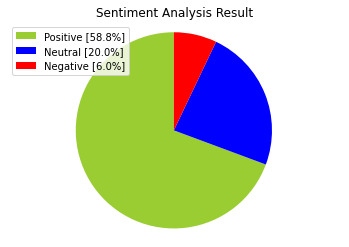

In [ ]:
#Creating PieCart
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result")
plt.axis('equal')
plt.show()

keyword = input('Please enter keyword or hashtag to search: ')
noOfTweet = int(input ('Please enter how many tweets to analyze: '))
tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
analysis_en=[]
for tweet in tweets:
    analysis_id = tweet.text
    translator=google_translator()
    analysisa=translator.translate(analysis_id)
analysisa

In [ ]:
tweet_list.drop_duplicates(inplace = True)
tweet_list

,0
0,RT @hyang_wisnu: Reformasi Sistem Perlindungan...
3,Undang-Undang Perlindungan Data Pribadi Menjam...
4,RT @titisan_suketi: Sukseskan REGSOSEK 2022\n\...
8,Kenapa ya provider seluler itu suka ngecut sis...
10,"RT @KPU_ID: #TemanPemilih, KPU menggelar Focus..."
...,...
404,#RT @bps_statistics: Regsosek ini merupakan pr...
405,RT bps_statistics: Regsosek ini merupakan prog...
406,Regsosek ini merupakan program prioritas pemer...
407,@collegemenfess uu perlindungan data pribadi j...


In [ ]:
#Cleaning Text (RT, Punctuation etc)
#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list['text'] = tw_list[0]
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub("RT @\w+: "," ",x)
rt = lambda x: re.sub("(@[A-Za-z0–9]+)|(\w+:\/\/\S+)"," ",x)
tw_list['text'] = tw_list.text.map(remove_rt).map(rt)
tw_list['text'] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @hyang_wisnu: Reformasi Sistem Perlindungan...,"reformasi sistem perlindungan, menkominfo dor..."
3,Undang-Undang Perlindungan Data Pribadi Menjam...,undang-undang perlindungan data pribadi menjam...
4,RT @titisan_suketi: Sukseskan REGSOSEK 2022\n\...,sukseskan regsosek 2022\n\ntunggu kehadiran p...
8,Kenapa ya provider seluler itu suka ngecut sis...,kenapa ya provider seluler itu suka ngecut sis...
10,"RT @KPU_ID: #TemanPemilih, KPU menggelar Focus...","#temanpemilih, kpu menggelar focus group disc..."
11,RT @KPU_ID: Bertindak selaku narasumber Ahmad ...,bertindak selaku narasumber ahmad alamsyah sa...
12,BRI juga berkomitmen dan memperkuat proteksi t...,bri juga berkomitmen dan memperkuat proteksi t...
13,BRI sendiri juga terys berkomitmen dan tetap m...,bri sendiri juga terys berkomitmen dan tetap m...
20,RT @Bilabqs: guys kalau dalam waktu Okt-14 Nov...,guys kalau dalam waktu okt-14 nov ada petugas...
21,Undang-undang Perlindungan Data Pribadi (UU PD...,undang-undang perlindungan data pribadi (uu pd...


In [ ]:
def clean_data(text):
    text = re.sub('@([a-zA-Z0-9_]+)', '', text) #menghapus @mention
    text = re.sub('@[^\s]+', '', text) #menghapus @mention
    text = re.sub('#[\s]+', '', text) #menghapus hashtag
    text = re.sub('RT[\s]+', '', text) #menghapus RT
    text = re.sub('https?:\/\/\S+', '', text) #menghapus hyperlink
    text = re.sub(' \d+', ' ', text) #menghapus angka
    text = re.sub('[^\w\s]', '', text) #menghapus tanda baca
    text = re.sub(r'\b[a-zA-Z]\b', '', text) #menghapus single character
    text = re.sub('\n', '', text) #menghapus \n
    text = re.sub('\r', '', text) #menghapus \r
    text = text.strip() #menghapus spasi
    text = text.lower() #lowercase
    return text

In [ ]:
tw_list = pd.DataFrame(tweet_list)
tw_list['text'] = tw_list[0].apply(clean_data)
tw_list

,0,text
0,RT @hyang_wisnu: Reformasi Sistem Perlindungan...,reformasi sistem perlindungan menkominfo doron...
3,Undang-Undang Perlindungan Data Pribadi Menjam...,undangundang perlindungan data pribadi menjami...
4,RT @titisan_suketi: Sukseskan REGSOSEK 2022\n\...,sukseskan regsosek tunggu kehadiran petugas re...
8,Kenapa ya provider seluler itu suka ngecut sis...,kenapa ya provider seluler itu suka ngecut sis...
10,"RT @KPU_ID: #TemanPemilih, KPU menggelar Focus...",temanpemilih kpu menggelar focus group discuss...
...,...,...
404,#RT @bps_statistics: Regsosek ini merupakan pr...,regsosek ini merupakan program prioritas pemer...
405,RT bps_statistics: Regsosek ini merupakan prog...,bps_statistics regsosek ini merupakan program ...
406,Regsosek ini merupakan program prioritas pemer...,regsosek ini merupakan program prioritas pemer...
407,@collegemenfess uu perlindungan data pribadi j...,uu perlindungan data pribadi juga rame tu dia ...


In [ ]:
#Stopword from custom data
alay = pd.read_csv('https://raw.githubusercontent.com/nasalsabila/kamus-alay/master/colloquial-indonesian-lexicon.csv')
#Memisahkan kalimat menjadi kata
slang = [word_tokenize(text) for text in alay['slang']]

In [ ]:
#Merubah list dalam list menjadi 1 list
slang_ = list(itertools.chain.from_iterable(slang))

In [ ]:
#Memisahkan kalimat menjadi kata
formal = [word_tokenize(text) for text in alay['formal']]

In [ ]:
#Merubah list dalam list menjadi 1 list
formal_ = list(itertools.chain.from_iterable(slang))

In [ ]:
#remove stopwords
raw = tw_list['text']
dff = [word_tokenize(paragraf) for paragraf in raw]
indo = stopwords.words('indonesian')
indo.extend(['yg','nya', 'dgn', 'dg', 'dr', 'ya', 'yaa', 'aja', 'utk', 'ni', 'tp', 'amp', 'dah', 'krn'
            ,'udah'])
indo.extend(slang_)
indo.extend(formal_)
hasil_stopword = []  
for i in range(len(dff)):
    data = [word for word in dff[i][:] if word not in indo]
    hasil_stopword.append(data)

hasil_join = []
for join in range(len(hasil_stopword)):
    hasil_join.append(' '.join(hasil_stopword[join]))
clean_data = hasil_join

In [ ]:
tw_list2 = pd.DataFrame(clean_data)
tw_list2['text']=tw_list2[0]

In [ ]:
#Calculating Negative, Positive, Neutral and Compound values
tw_list2[['polarity', 'subjectivity']] = tw_list2['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list2['text'].iteritems():
    analysisb=translator.translate(row,lang_src='id',lang_tgt='en')
    score = SentimentIntensityAnalyzer().polarity_scores(analysisb)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list2.loc[index, 'sentiment'] = 'negative'
    elif pos > neg:
        tw_list2.loc[index, 'sentiment'] = 'positive'
    else:
        tw_list2.loc[index, 'sentiment'] = 'neutral'
    tw_list2.loc[index, 'neg'] = neg
    tw_list2.loc[index, 'neu'] = neu
    tw_list2.loc[index, 'pos'] = pos
    tw_list2.loc[index, 'compound'] = comp
tw_list2.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,reformasi sistem perlindungan menkominfo doron...,reformasi sistem perlindungan menkominfo doron...,0.0,0.0,positive,0.0,0.854,0.146,0.4404
1,undangundang perlindungan data pribadi menjami...,undangundang perlindungan data pribadi menjami...,0.0,0.0,positive,0.0,0.833,0.167,0.3400
2,sukseskan regsosek tunggu kehadiran petugas re...,sukseskan regsosek tunggu kehadiran petugas re...,0.0,0.0,positive,0.0,0.775,0.225,0.4939
3,provider seluler suka ngecut sisa data sisa beli,provider seluler suka ngecut sisa data sisa beli,0.0,0.0,positive,0.0,0.811,0.189,0.4215
4,temanpemilih kpu menggelar focus group discuss...,temanpemilih kpu menggelar focus group discuss...,0.0,0.0,positive,0.0,0.846,0.154,0.4767
5,bertindak narasumber ahmad alamsyah saragih pa...,bertindak narasumber ahmad alamsyah saragih pa...,0.0,0.0,positive,0.0,0.833,0.167,0.3400
6,bri berkomitmen memperkuat proteksi data nasab...,bri berkomitmen memperkuat proteksi data nasab...,0.0,0.0,positive,0.0,0.694,0.306,0.6486
7,bri terys berkomitmen menekankan perlindungan ...,bri terys berkomitmen menekankan perlindungan ...,0.0,0.0,positive,0.0,0.649,0.351,0.6597
8,guys okt14 nov petugas sensus bps rumah survei...,guys okt14 nov petugas sensus bps rumah survei...,0.0,0.0,neutral,0.0,1.000,0.000,0.0000
9,undangundang perlindungan data pribadi uu pdp ...,undangundang perlindungan data pribadi uu pdp ...,0.0,0.0,neutral,0.0,1.000,0.000,0.0000


In [ ]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list2_negative = tw_list2[tw_list2["sentiment"]=="negative"]
tw_list2_positive = tw_list2[tw_list2["sentiment"]=="positive"]
tw_list2_neutral = tw_list2[tw_list2["sentiment"]=="neutral"]

In [ ]:
tw_list2_negative[0]

27     5 takut perlindungan datadata pribadi aplikasi...
85     dprd payakumbuh pemko secepatnya perlindungan ...
91     prinsip dasar perlindungan data pribadi purpos...
145    ayo share data pribadi contoh ijazah orgketent...
161    bunuh mmc millenialsberdasarkan data komnas pe...
164    simak infografis diatas ragam ancaman pidana p...
170    ayo share data pribadi contoh ijazah orgketent...
Name: 0, dtype: object

In [ ]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(tw_list2,'sentiment')

,Total,Percentage
positive,160,66.95
neutral,72,30.13
negative,7,2.93


In [ ]:
count_values_in_column(tw_list2,'sentiment').iloc[0,1]

66.95

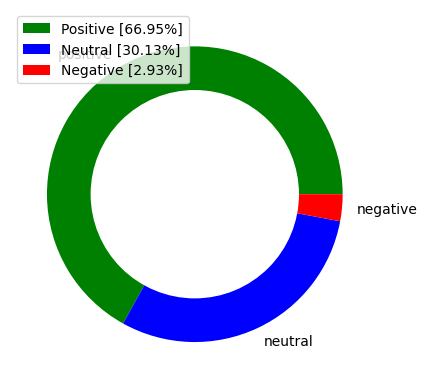

In [ ]:
# Penyusunan data kedalam Grafik
pc = count_values_in_column(tw_list2,'sentiment')
names= pc.index
size=pc['Percentage']

negative=count_values_in_column(tw_list2,'sentiment').iloc[0,1]
positive=count_values_in_column(tw_list2,'sentiment').iloc[1,1]
neutral=count_values_in_column(tw_list2,'sentiment').iloc[2,1]
labels = ['Positive ['+str(negative)+'%]', 'Neutral ['+str(positive)+'%]' , 'Negative ['+str(neutral)+'%]']
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
plt.legend(labels, loc='upper left')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
pc

,Total,Percentage
positive,160,66.95
neutral,72,30.13
negative,7,2.93


In [ ]:
#Penyusunan Wordcloud
factory = StopWordRemoverFactory()
STOPWORDS = factory.get_stop_words()
def create_wordcloud(text):
    #mask = np.array(Image.open('/content/sample_data/pic.png'))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color='white',
    max_words=30,
    stopwords=stopwords,
    repeat=False)
    wc.generate(str(text))
    wc.to_file('/content/sample_data/wc.png')
    print('Word Cloud Saved Successfully')
    path='/content/sample_data/wc.png'
    display(Image.open(path))

Word Cloud Saved Successfully


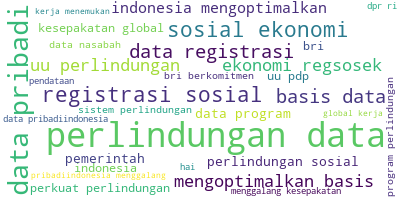

In [ ]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list2['text'].values)

Word Cloud Saved Successfully


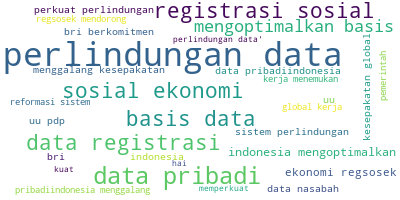

In [ ]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list2_positive['text'].values)

Word Cloud Saved Successfully


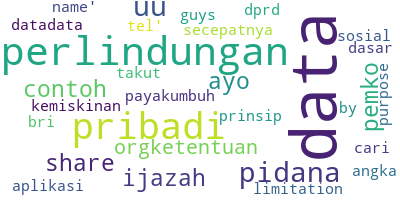

In [ ]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list2_negative['text'].values)

In [ ]:
#Calculating tweet’s lenght and word count
tw_list2['text_len'] = tw_list2['text'].astype(str).apply(len)
tw_list2['text_word_count'] = tw_list2['text'].apply(lambda x: len(str(x).split()))
round(pd.DataFrame(tw_list2.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,83.43
neutral,75.19
positive,81.07


In [ ]:
tw_list.to_csv('twlist_260921.csv')
tw_list2.to_csv('twlist2_260921.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
tweet_list.to_csv('twawal_260921.csv')

In [ ]:
analysis_id

'UU PDP Disahkan, Konsumen Dinilai Makin Nyaman Bertransaksi Digital\n\nPengesahan RUU Perlindungan Data Pribadi (PDP)… https://t.co/C2q4bJ4BIC'

In [ ]:
#Removing Punctuation
def remove_punct(text):
    text = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0–9]+','', text)
    return text
tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text
tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

#Removing stopwords
factory = StopWordRemoverFactory()
stopword = factory.get_stop_words()
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))
#Appliyng Stemmer
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text
tw_list.head()

,0,text,punct,tokenized,nonstop,stemmed
0,RT @hyang_wisnu: Reformasi Sistem Perlindungan...,reformasi sistem perlindungan menkominfo doron...,reformasi sistem perlindungan menkominfo doron...,"[reformasi, sistem, perlindungan, menkominfo, ...","[reformasi, sistem, perlindungan, menkominfo, ...","[reformasi, sistem, perlindungan, menkominfo, ..."
3,Undang-Undang Perlindungan Data Pribadi Menjam...,undangundang perlindungan data pribadi menjami...,undangundang perlindungan data pribadi menjami...,"[undangundang, perlindungan, data, pribadi, me...","[undangundang, perlindungan, data, pribadi, me...","[undangundang, perlindungan, data, pribadi, me..."
4,RT @titisan_suketi: Sukseskan REGSOSEK 2022\n\...,sukseskan regsosek tunggu kehadiran petugas re...,sukseskan regsosek tunggu kehadiran petugas re...,"[sukseskan, regsosek, tunggu, kehadiran, petug...","[sukseskan, regsosek, tunggu, kehadiran, petug...","[sukseskan, regsosek, tunggu, kehadiran, petug..."
8,Kenapa ya provider seluler itu suka ngecut sis...,kenapa ya provider seluler itu suka ngecut sis...,kenapa ya provider seluler itu suka ngecut sis...,"[kenapa, ya, provider, seluler, itu, suka, nge...","[provider, seluler, suka, ngecut, sisa, data, ...","[provid, selul, suka, ngecut, sisa, data, sisa..."
10,"RT @KPU_ID: #TemanPemilih, KPU menggelar Focus...",temanpemilih kpu menggelar focus group discuss...,temanpemilih kpu menggelar focus group discuss...,"[temanpemilih, kpu, menggelar, focus, group, d...","[temanpemilih, kpu, menggelar, focus, group, d...","[temanpemilih, kpu, menggelar, focu, group, di..."


In [ ]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

239 Number of reviews has 788 words


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,,aaji,adaktif,adal,adanya,agenda,ah,ahi,ahmad,aja,...,wawancara,web,websit,widodo,wisatawan,wujudkan,yaa,yg,yuk,zona
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
perlindungan,157
pribadi,67
regsosek,65
sosial,52
uu,41
indonesia,41
pemerintah,38
ekonomi,36
registrasi,34
program,32


In [ ]:
tweet_list

,0,text,punct,tokenized,nonstop,stemmed
0,RT @hyang_wisnu: Reformasi Sistem Perlindungan...,reformasi sistem perlindungan menkominfo doron...,reformasi sistem perlindungan menkominfo doron...,"[reformasi, sistem, perlindungan, menkominfo, ...","[reformasi, sistem, perlindungan, menkominfo, ...","[reformasi, sistem, perlindungan, menkominfo, ..."
3,Undang-Undang Perlindungan Data Pribadi Menjam...,undangundang perlindungan data pribadi menjami...,undangundang perlindungan data pribadi menjami...,"[undangundang, perlindungan, data, pribadi, me...","[undangundang, perlindungan, data, pribadi, me...","[undangundang, perlindungan, data, pribadi, me..."
4,RT @titisan_suketi: Sukseskan REGSOSEK 2022\n\...,sukseskan regsosek tunggu kehadiran petugas re...,sukseskan regsosek tunggu kehadiran petugas re...,"[sukseskan, regsosek, tunggu, kehadiran, petug...","[sukseskan, regsosek, tunggu, kehadiran, petug...","[sukseskan, regsosek, tunggu, kehadiran, petug..."
8,Kenapa ya provider seluler itu suka ngecut sis...,kenapa ya provider seluler itu suka ngecut sis...,kenapa ya provider seluler itu suka ngecut sis...,"[kenapa, ya, provider, seluler, itu, suka, nge...","[provider, seluler, suka, ngecut, sisa, data, ...","[provid, selul, suka, ngecut, sisa, data, sisa..."
10,"RT @KPU_ID: #TemanPemilih, KPU menggelar Focus...",temanpemilih kpu menggelar focus group discuss...,temanpemilih kpu menggelar focus group discuss...,"[temanpemilih, kpu, menggelar, focus, group, d...","[temanpemilih, kpu, menggelar, focus, group, d...","[temanpemilih, kpu, menggelar, focu, group, di..."
...,...,...,...,...,...,...
404,#RT @bps_statistics: Regsosek ini merupakan pr...,regsosek ini merupakan program prioritas pemer...,regsosek ini merupakan program prioritas pemer...,"[regsosek, ini, merupakan, program, prioritas,...","[regsosek, merupakan, program, prioritas, peme...","[regsosek, merupakan, program, priorita, pemer..."
405,RT bps_statistics: Regsosek ini merupakan prog...,bps_statistics regsosek ini merupakan program ...,bpsstatistics regsosek ini merupakan program p...,"[bpsstatistics, regsosek, ini, merupakan, prog...","[bpsstatistics, regsosek, merupakan, program, ...","[bpsstatist, regsosek, merupakan, program, pri..."
406,Regsosek ini merupakan program prioritas pemer...,regsosek ini merupakan program prioritas pemer...,regsosek ini merupakan program prioritas pemer...,"[regsosek, ini, merupakan, program, prioritas,...","[regsosek, merupakan, program, prioritas, peme...","[regsosek, merupakan, program, priorita, pemer..."
407,@collegemenfess uu perlindungan data pribadi j...,uu perlindungan data pribadi juga rame tu dia ...,uu perlindungan data pribadi juga rame tu dia ...,"[uu, perlindungan, data, pribadi, juga, rame, ...","[uu, perlindungan, data, pribadi, rame, tu, sm...","[uu, perlindungan, data, pribadi, rame, tu, sm..."
